In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\sulet\Downloads\EDA-BA-reviews.csv")

In [3]:
df.head(2)

,stars,date,country,verified,corpus,rating_category,year
0,5,2024-02-17,United States,False,verified flown ba five time western usa englan...,okay,2024
1,3,2024-02-17,United Kingdom,True,london heathrow istanbul start half term schoo...,bad,2024


In [4]:
df.drop(columns={'date', 'verified'}, inplace=True)

In [5]:
df.head(2)

,stars,country,corpus,rating_category,year
0,5,United States,verified flown ba five time western usa englan...,okay,2024
1,3,United Kingdom,london heathrow istanbul start half term schoo...,bad,2024


For Text Analysis:
1) We will analyze overall text reviews,globally 
2) Good and Bad Reviews per year

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


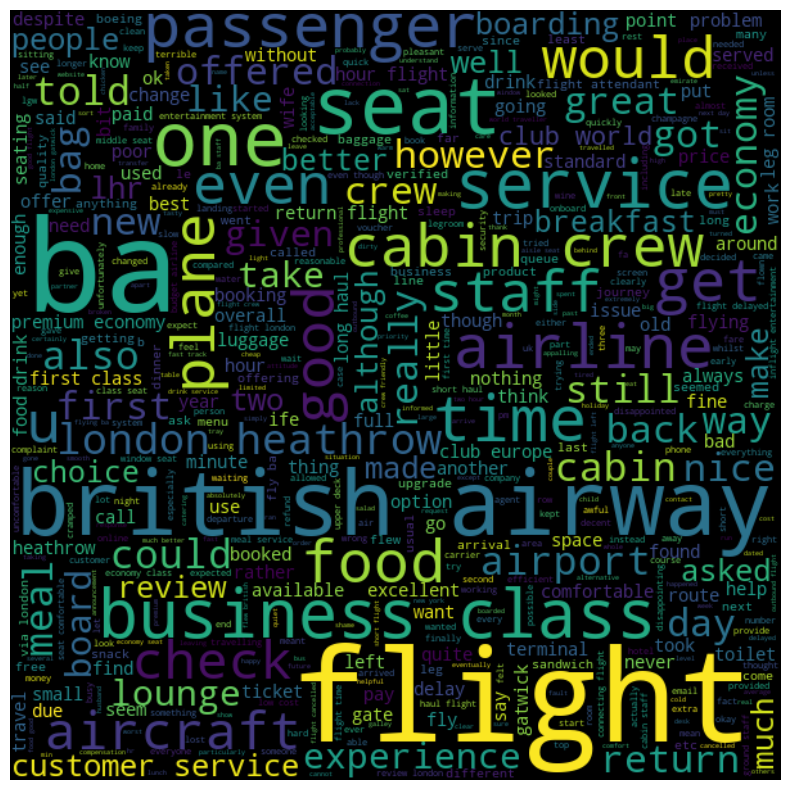

In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud  # Import WordCloud class

# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let us discard the irrelevant words.

In [8]:
stopwords.update(['flight', 'always', 'rather', 'first', 'really', 'got', 'without', 'offering', 'many', 'review', 'london', 'could', 'heathrow', 'say', 'would', 'get', 'like', 'ba', 'even', 'one', 'told', 'next', 'seemed', 'still', 'made', 'given', 'quite', 'know', 'since', 'found', 'british', 'airway', 'problem', 'although', 'point', 'think', 'lhr', 'offered', 'also', 'aircraft'])

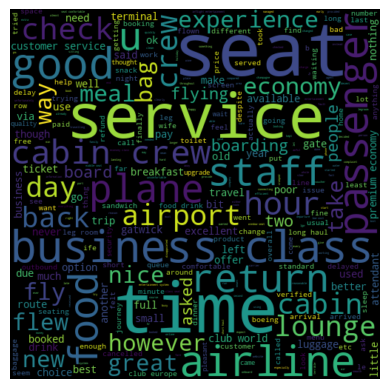

In [9]:
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

What are the 10 most frequent words?

In [10]:
# Get the word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Sort them
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 words and their frequencies
top_30_words = sorted_word_frequencies[:30]

for word, freq in top_30_words:
    count = int(freq * len(reviews.split()))  
    print(f"{word}: {count}")

seat: 311162
time: 268279
service: 210230
business class: 199596
good: 192101
airline: 186522
passenger: 181990
food: 168916
staff: 163861
plane: 157062
u: 156888
return: 156888
cabin crew: 155319
hour: 146777
check: 128822
crew: 126556
airport: 118189
cabin: 117491
lounge: 113656
day: 113133
back: 111565
experience: 106684
fly: 105986
meal: 104592
economy: 101628
way: 98142
new: 97968
nice: 97270
great: 95701
flew: 95527


These are the 30 most frequent words.
Now, I will update the stopwords and this list.

In [11]:
stopwords.update(['good', 'u'])

In [12]:
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

In [13]:
# Get the word frequencies from the WordCloud object
word_frequencies = wordcloud.words_

# Sort them
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top 23 words and their frequencies
top_23_words = sorted_word_frequencies[:23]

for word, freq in top_23_words:
    count = int(freq * len(reviews.split()))  
    print(f"{word}: {count}")

seat: 311162
time: 269183
service: 249594
food: 219510
business class: 200270
airline: 186102
passenger: 182604
staff: 164413
plane: 159341
return: 157417
cabin crew: 155843
hour: 147272
crew: 135728
check: 129257
airport: 118587
experience: 118238
cabin: 117888
lounge: 114040
day: 113515
back: 111941
fly: 106344
meal: 104945
economy: 101971


In [14]:
# Extract words and counts
words = [word for word, _ in top_23_words]
counts = [int(freq * len(reviews.split())) for _, freq in top_23_words]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'time'),
  Text(2, 0, 'service'),
  Text(3, 0, 'food'),
  Text(4, 0, 'business class'),
  Text(5, 0, 'airline'),
  Text(6, 0, 'passenger'),
  Text(7, 0, 'staff'),
  Text(8, 0, 'plane'),
  Text(9, 0, 'return'),
  Text(10, 0, 'cabin crew'),
  Text(11, 0, 'hour'),
  Text(12, 0, 'crew'),
  Text(13, 0, 'check'),
  Text(14, 0, 'airport'),
  Text(15, 0, 'experience'),
  Text(16, 0, 'cabin'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'day'),
  Text(19, 0, 'back'),
  Text(20, 0, 'fly'),
  Text(21, 0, 'meal'),
  Text(22, 0, 'economy')])

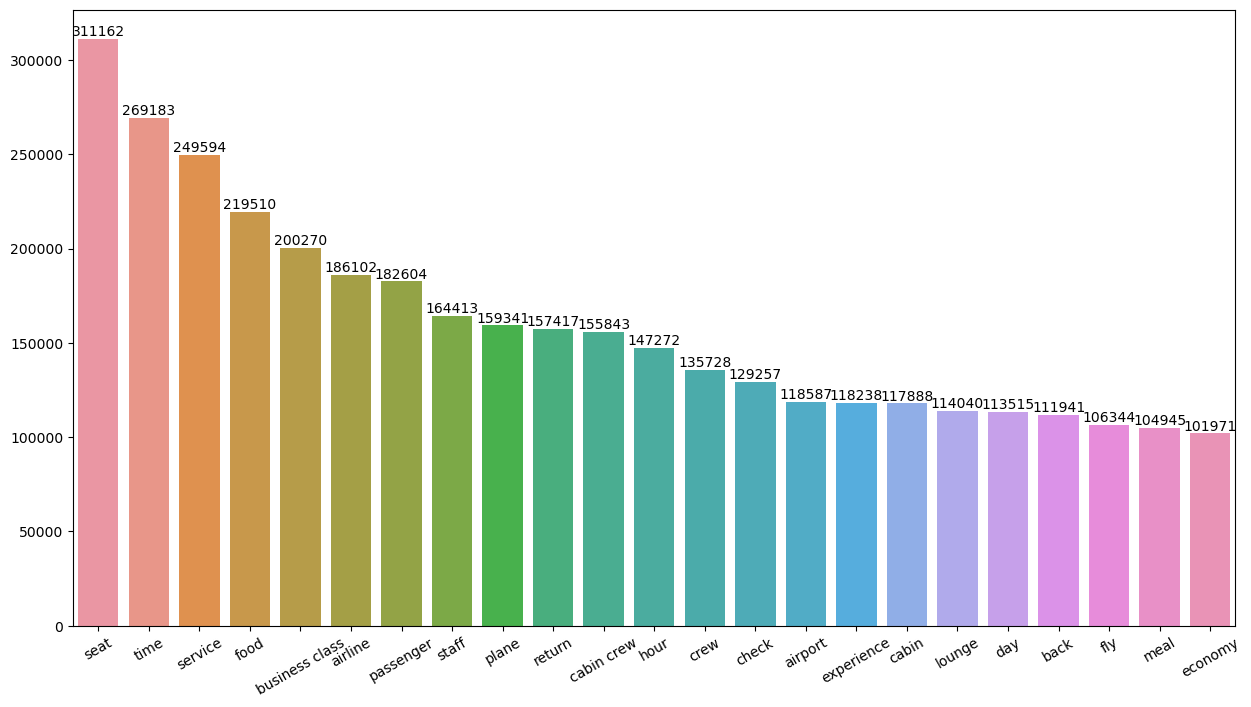

In [15]:
import seaborn as sns

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=words, y=counts, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

These are the most used words, however, this is not enough to determine whether the words here are used in a positive context or negative.
Thus, a solution here would be to classify the reviews as good and bad, and then taking respective wordclouds to understand the context.

Another approach is to split the reviews in the first place, and then use N-grams to identify words used together.

In [16]:
#split reviews
good_ratings = df[df.stars.isin([1,2,3])]
avg_ratings = df[df.stars.isin([4,5,6])]
bad_ratings = df[df.stars.isin([7,8,9,10])]

#join respective reviews
good_reviews = " ".join(good_ratings.corpus)
avg_reviews = " ".join(avg_ratings.corpus)
bad_reviews = " ".join(bad_ratings.corpus)

#split the text of respective reviews into a list of words
words_good = good_reviews.split(" ")
words_avg = avg_reviews.split(" ")
words_bad = bad_reviews.split(" ")

In [18]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

words_good = [word for word in words_good if word not in stopwords]
words_avg = [word for word in words_avg if word not in stopwords]
words_bad = [word for word in words_bad if word not in stopwords]

<Axes: >

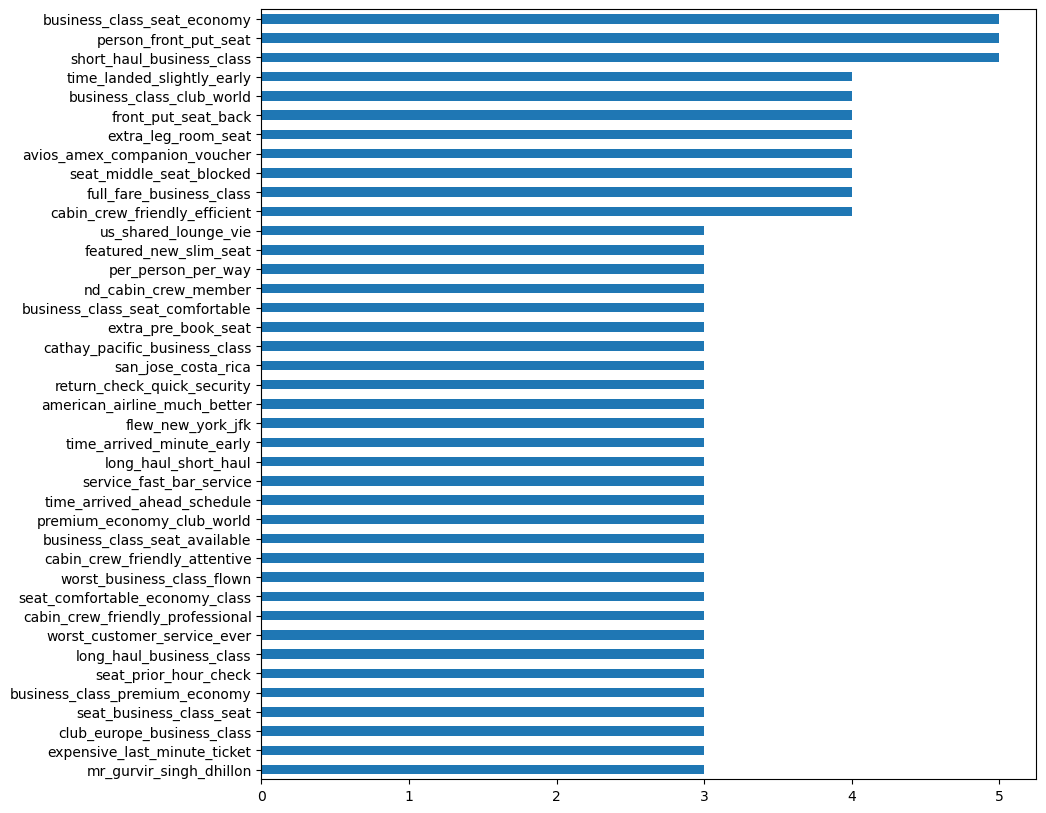

In [21]:
#N-gram for good reviews
get_freq_dist(words_good, 4)

<Axes: >

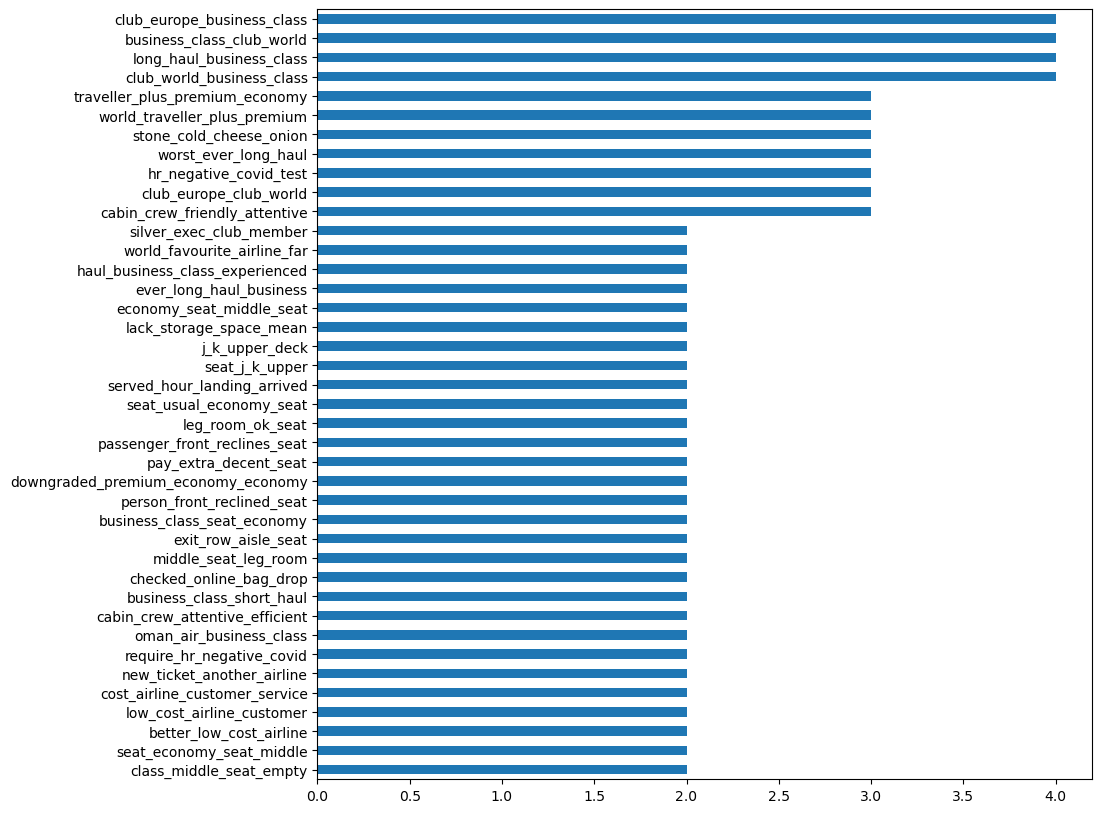

In [22]:
#N-gram for average reviews
get_freq_dist(words_avg, 4)

<Axes: >

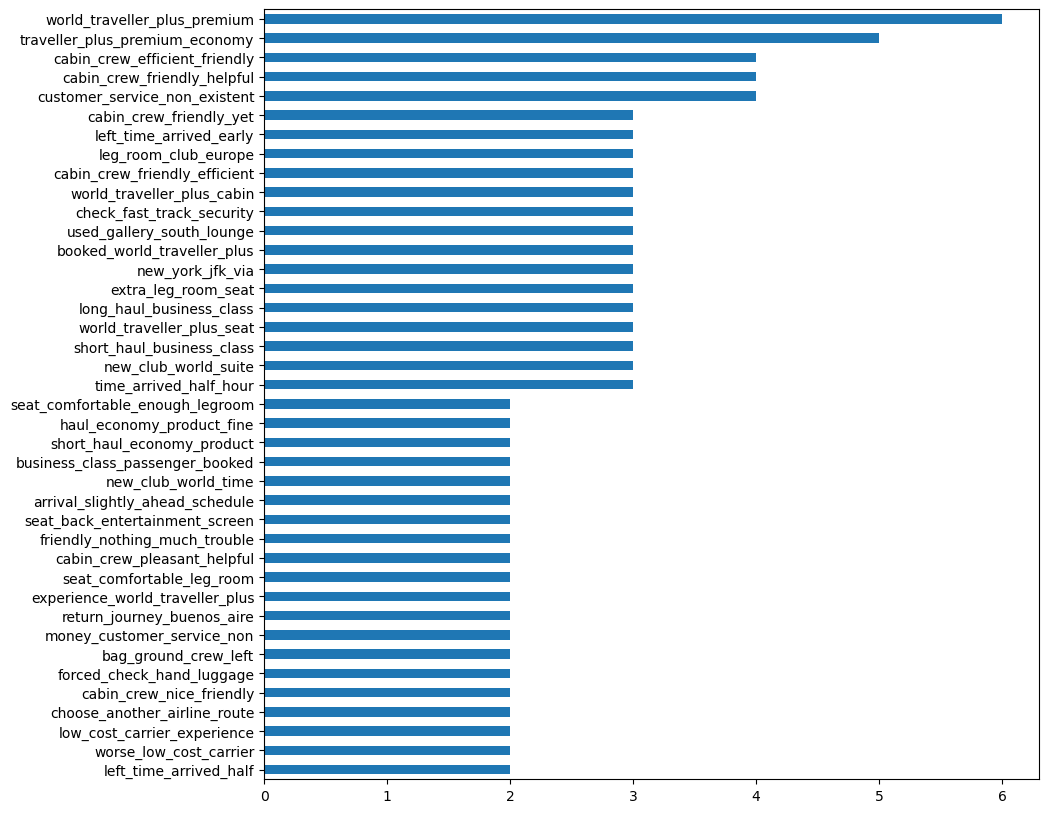

In [23]:
#N-gram for bad reviews
get_freq_dist(words_bad, 4)

These are the N-grams with good, avg, and bad reviews

Now we will use textblob library to define if the text is negative or positive and to what extent.
TextBlob is used to process textual data, offer a simple API for common NLP tasks like sentiment analysis. 

In [25]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ------------------------------- -------- 491.5/626.3 kB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [27]:
#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

C:\Users\sulet\AppData\Local\Temp\ipykernel_19404\4213434199.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = polarity


Polarity score is given between -1 to 1 and more close to -1 indicates a negative review and more close to 1 indicates a positive review. 

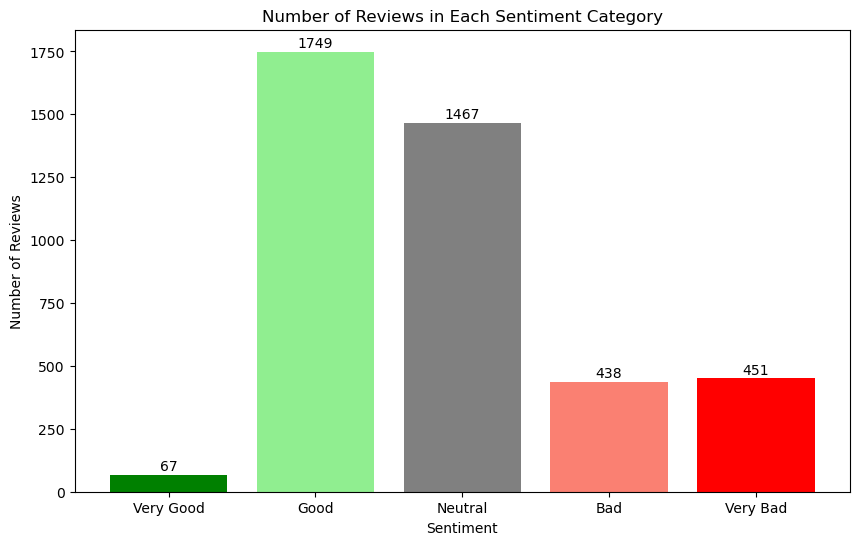

In [33]:
import matplotlib.pyplot as plt

# Calculate the number of reviews in each sentiment category
very_good_reviews = df[(df['polarity'] > 0.5) & (df['polarity'] < 1)].shape[0]
good_reviews = df[(df['polarity'] > 0.1) & (df['polarity'] < 0.5)].shape[0]
neutral_reviews = df[(df['polarity'] > -0.1) & (df['polarity'] < 0.1)].shape[0]
bad_reviews = df[(df['polarity'] > -0.5) & (df['polarity'] < -0.1)].shape[0]
very_bad_reviews = df[(df['polarity'] < -0.1) & (df['polarity'] > -1)].shape[0]

# Create a bar graph
categories = ['Very Good', 'Good', 'Neutral', 'Bad', 'Very Bad']
counts = [very_good_reviews, good_reviews, neutral_reviews, bad_reviews, very_bad_reviews]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['green', 'lightgreen', 'gray', 'salmon', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Each Sentiment Category')

# Add text labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


Another method of labelling the reveiws as very good, good, neutral, bad, and very bad. In this we will use VADER algorihtm by nltk library.

In [35]:
%%capture
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

vds = SentimentIntensityAnalyzer()

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sulet\AppData\Roaming\nltk_data...


In [36]:
df.label.value_counts()

label
 1    2396
-1    1227
 0     127
Name: count, dtype: int64

This implies that there are 2396 good reviews, 1227 bad reviews, and 127 neutral reviews

Now, i will use Topic Modeling with Latent Dirichlet Allocation (LDA), which is a statistical model used to discover abstract topics in a collection of text documents. 

In [39]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

# Create an object of CountVectorizer
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [41]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,den,7.8,flight,314.0,good,434.3,seat,1988.9,flight,3003.4,flight,2060.7,seat,903.7,flight,589.1
1,sideways,4.9,told,189.6,flight,375.3,flight,1347.1,ba,1953.8,ba,1374.9,class,893.7,bag,349.5
2,two,4.9,hour,131.1,crew,346.6,ba,1006.0,time,1276.3,customer,659.0,business,684.2,luggage,320.4
3,passenger,4.6,one,114.5,excellent,272.4,economy,928.5,crew,1248.1,airline,653.5,flight,344.2,hour,311.1
4,buggy,4.5,asked,108.7,food,266.3,food,896.1,service,1168.4,service,637.8,ba,332.9,london,285.4
5,pretzel,4.1,get,105.9,cabin,254.4,service,615.4,cabin,1033.8,british,599.6,cabin,289.6,ba,280.1
6,stare,4.0,said,97.7,service,239.6,british,590.1,seat,972.9,would,594.8,first,267.6,baggage,211.4
7,csd,4.0,could,96.4,first,199.6,airway,577.2,food,950.4,airway,594.0,good,246.7,day,211.1
8,africa,3.9,day,95.4,great,193.0,good,570.4,lounge,877.1,hour,584.1,crew,241.6,airway,209.1
9,route,3.7,time,95.2,london,190.0,london,539.9,good,797.9,seat,548.0,service,220.6,airport,206.9


Now, I will use Topic Modeling with Non-negative Matrix Factorization (NMF) to extract abstract topics from a collection of text documents. 
It is widely used in NLP for document clustering, text summarization, and information retrieval.

In [42]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03819653, 0.04422999],
       [0.06886271, 0.19584112],
       [0.03898449, 0.22629794],
       ...,
       [0.10436111, 0.18281114],
       [0.02520187, 0.03575866],
       [0.09344119, 0.        ]])

In [44]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic_NMF =pd.DataFrame(topic_dict)

In [45]:
df_topic_NMF

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,24.2,flight,19.9
1,ba,13.6,ba,6.7
2,class,10.8,hour,4.6
3,food,8.6,time,3.8
4,business,8.5,london,3.5
5,service,8.3,airway,3.3
6,cabin,8.1,british,3.3
7,good,7.6,service,3.2
8,crew,7.4,would,2.8
9,economy,6.5,airline,2.4


With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.